## Практична робота 3 

# Візуалізація Matplotlib 

### Датасет Most Streamed Spotify Songs 2023 
https://www.kaggle.com/dfsets/nelgiriyewithana/top-spotify-songs-2023 

#### Description:
This dfset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dfset offers a wealth of features beyond what is typically available in similar dfsets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dfset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.

#### Key Features:
- track_name: Name of the song
- artist(s)_name: Name of the artist(s) of the song
- artist_count: Number of artists contributing to the song
- released_year: Year when the song was released
- released_month: Month when the song was released
- released_day: Day of the month when the song was released
- in_spotify_playlists: Number of Spotify playlists the song is included in
- in_spotify_charts: Presence and rank of the song on Spotify charts
- streams: Total number of streams on Spotify
- in_apple_playlists: Number of Apple Music playlists the song is included in
- in_apple_charts: Presence and rank of the song on Apple Music charts
- in_deezer_playlists: Number of Deezer playlists the song is included in
- in_deezer_charts: Presence and rank of the song on Deezer charts
- in_shazam_charts: Presence and rank of the song on Shazam charts
- bpm: Beats per minute, a measure of song tempo
- key: Key of the song
- mode: Mode of the song (major or minor)
- danceability_%: Percentage indicating how suitable the song is for dancing
- valence_%: Positivity of the song's musical content
- energy_%: Perceived energy level of the song
- acousticness_%: Amount of acoustic sound in the song
- instrumentalness_%: Amount of instrumental content in the song
- liveness_%: Presence of live performance elements
- speechiness_%: Amount of spoken words in the song

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("spotify-2023.csv", encoding="ISO-8859-1")
pd.set_option('display.max_columns', None)
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [3]:
# розмір датасету
print(f"Датасет містить {df.shape[0]} рядків та {df.shape[1]} стовпці")

Датасет містить 953 рядків та 24 стовпці


In [4]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [5]:
# пропущені значення
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [6]:
# для того, щоб зрозуміти, як діяти з пропущеними значеннями, треба подивитися на рядки, де вони є
df[df.isna().any(axis=1)].head(20)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,300,215,745,58,"1,021",118,NaN,Major,71,65,68,6,0,3,7
14,As It Was,Harry Styles,1,2022,3,31,23575,130,2513188493,403,198,863,46,NaN,174,F#,Minor,52,66,73,34,0,31,6
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,2023,7,13,873,104,30546883,80,227,95,24,"1,173",78,NaN,Major,44,14,9,96,0,10,3
22,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,12859,110,1297026226,24,98,582,2,73,135,NaN,Minor,48,44,42,12,2,11,3
35,Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK,...",8,2023,6,1,1150,31,123122413,22,33,34,7,184,120,NaN,Major,81,63,68,11,0,11,4
44,Barbie World (with Aqua) [From Barbie The Album],"Nicki Minaj, Aqua, Ice Spice",3,2023,6,23,1117,80,65156199,82,145,65,16,"1,133",144,NaN,Major,77,75,58,52,0,23,25
46,I Ain't Worried,OneRepublic,1,2022,5,13,8431,76,1085685420,241,127,458,37,332,140,NaN,Major,71,82,81,11,0,6,5
54,Another Love,Tom Odell,1,2012,10,15,18371,83,1813673666,250,122,"3,394",19,NaN,123,E,Minor,45,13,54,70,0,9,4
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,199,"3,421",20,NaN,171,C#,Major,50,38,80,0,0,9,7
58,S91,Karol G,1,2023,7,14,525,41,16011326,34,115,39,6,216,128,NaN,Minor,86,42,72,59,0,9,19


In [7]:
# і також подивилася чи є дублікати
df.duplicated().sum()

0

Я прийняла рішення видалити пропущені значення, адже ці колонки представляють інформацію, яка не може бути легко заповнена середнім значенням або іншими статистичними показниками.

Ще варіантом було заповнити пропущені значення в "in_shazam_charts" 0, що б означало, що пісня відсутня у чартах Шарзаму. Але подивилася чи присутні ті пісні в інших чартах, виявилося, що в більшості випадків – так. Думаю, що якщо пісня є в одних чартах, що показує її рівень популярності, то має бути і в інших, можливо просто на іншому місці. 

In [8]:
df = df.dropna()
df.isna().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [9]:
# тепер датасет має такий розмір
df.shape

(817, 24)

Подивимося на типи даних

In [10]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [11]:
# з опису колонок зрозуміло, що "streams", "in_deezer_playlists" мають бути числового типу
# streams: Total number of streams on Spotify
# in_deezer_playlists: Number of Deezer playlists the song is included in

# потім звернула ще увагу на такі колонки як "in_deezer_charts" та "in_shazam_charts"; 
# перша має тип int, друга object, хоча вони несуть схожий сенс
# вирішила змінити "in_shazam_charts" на int, адже якщо ми будемо використовувати ці дані для порівняння, наприклад, вони мають бути числового типу
# in_shazam_charts: Presence and rank of the song on Shazam charts

# df['streams'] = df['streams'].astype(int)
# df['in_deezer_playlists'] = df['in_deezer_playlists'].astype(int)
# df['in_shazam_charts'] = df['in_shazam_charts'].astype(int)

# зіткнулася з проблемою:
# OverflowError: Python int too large to convert to C long

# залишила код закоментованим, аби було видно етапи роботи і причина рішення використати інший спосіб:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')

df.dtypes 

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists     float64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

Вважаю, що тепер можна переходити до візуалізацій

### Завдання 1
Завдання полягає в тому, щоб побудувати горизонтальну стовпчикову діаграму, на якій відображаються 10 найпопулярніших пісень на Spotify у 2023 році за кількістю прослуховувань. 

In [12]:
top_10_songs = df.sort_values(by="streams", ascending=False).head(10)
top_10_songs

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,0,NaN,7,0.0,96,C#,Minor,83,93,65,58,0,9,8
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,117,843.0,4,69.0,90,D,Major,76,91,50,54,0,7,5
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2.713922e+09,433,107,NaN,0,26.0,104,C#,Major,77,36,63,1,0,36,5
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2.665344e+09,492,99,798.0,31,0.0,170,C#,Major,59,48,76,4,0,10,5
140,Believer,Imagine Dragons,1,2017,1,31,18986,23,2.594040e+09,250,121,NaN,10,31.0,125,A#,Minor,77,74,78,4,0,23,11
725,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2.591224e+09,315,159,NaN,0,44.0,95,G#,Major,75,64,52,41,0,11,3
48,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2.565530e+09,281,137,NaN,1,140.0,186,G,Major,68,49,59,16,0,13,28
138,Perfect,Ed Sheeran,1,2017,1,1,16596,13,2.559529e+09,7,0,NaN,0,0.0,95,G#,Major,60,17,45,16,0,11,2
693,Seï¿½ï¿½o,"Shawn Mendes, Camila Cabello",2,2019,6,19,15010,2,2.484813e+09,453,50,NaN,1,8.0,117,A,Minor,76,77,52,4,0,8,3
324,Say You Won't Let Go,James Arthur,1,2016,9,9,15722,16,2.420461e+09,231,37,NaN,0,13.0,99,A#,Major,40,45,56,69,0,9,5


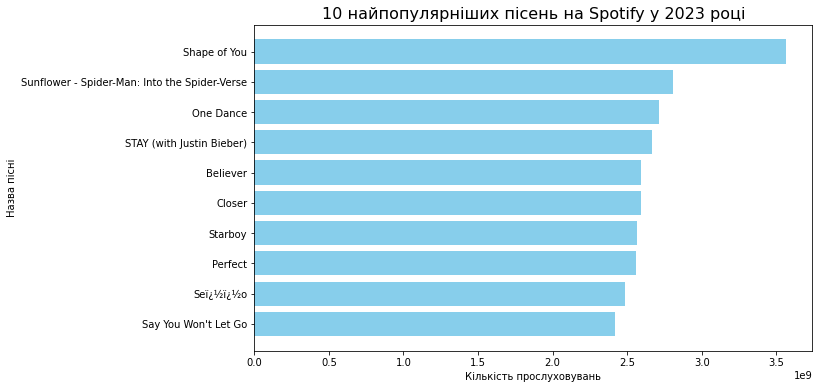

In [13]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_songs['track_name'], top_10_songs['streams'], color='skyblue')
plt.xlabel('Кількість прослуховувань')
plt.ylabel('Назва пісні')
plt.title('10 найпопулярніших пісень на Spotify у 2023 році', fontsize=16)
plt.gca().invert_yaxis()  # Інвертувала вісь Y для відображення найпопулярнішої пісні вгорі
plt.show()

Погралася з налаштуваннями:

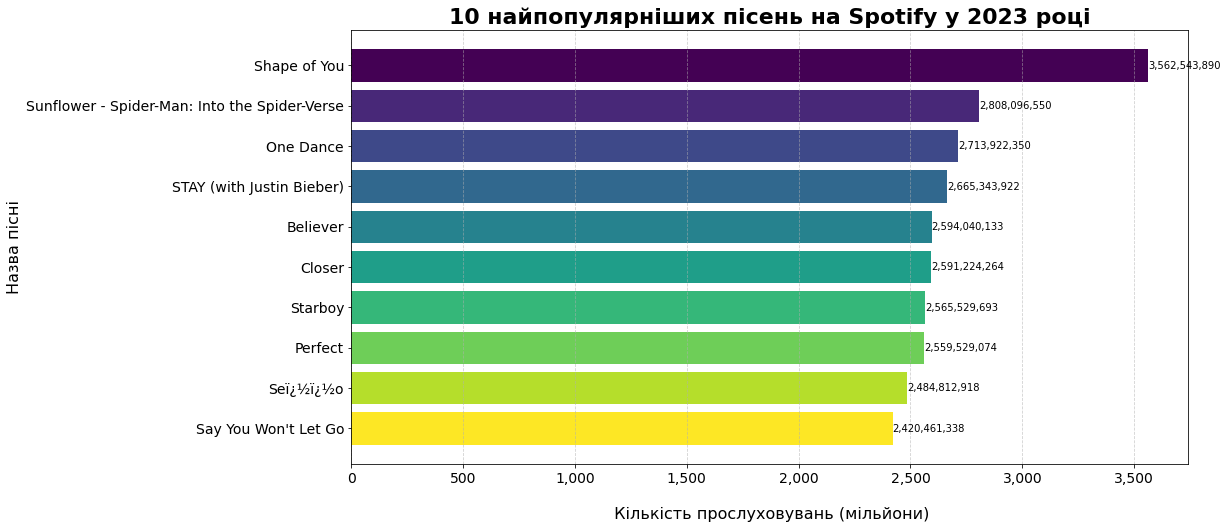

In [36]:
plt.figure(figsize=(15, 8))
ax = plt.gca()
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_songs)))
bars = plt.barh(top_10_songs['track_name'], top_10_songs['streams'], color=colors)

# Додала текст зі значеннями над кожною смугою
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width):,}', va='center', fontsize=10, color='black')

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x / 1e6))) # змінила формат відображення мільйонів
plt.xlabel('\n Кількість прослуховувань (мільйони)', fontsize=16)
plt.ylabel('Назва пісні', fontsize=16)
plt.title('10 найпопулярніших пісень на Spotify у 2023 році', fontsize=22, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Завдання 2
Розподіл жанрів найпопулярніших пісень: Створіть кругову діаграму або секторну діаграму, яка відображає розподіл жанрів серед найпопулярніших пісень у 2023 році. 

##### `Побудувала кругову діаграму, яка візуалізує частку пісень, які потрапили в Спотіфай чарти`

- подивилася на те, як виглядають дані про ці пісні

In [15]:
df[df['in_spotify_charts'] != 0].head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,263,45.0,10,826.0,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,126,58.0,14,382.0,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,207,91.0,14,949.0,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,207,125.0,12,548.0,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,133,87.0,15,425.0,144,A,Minor,65,23,80,14,63,11,6


- кількість таких пісень

In [16]:
spotify_chart_songs = df[df['in_spotify_charts'] != 0].track_name.nunique()
songs = df.track_name.nunique()

print(f"Кількість пісень, що потрапили в Spotify чарти: {spotify_chart_songs}")
print(f"Загальна кількість пісень в датасеті: {songs}")

Кількість пісень, що потрапили в Spotify чарти: 469
Загальна кількість пісень в датасеті: 811


In [17]:
# перевірю аналітично відношення пісень
print(spotify_chart_songs/songs * 100)

57.82983970406905


- ВІЗУАЛІЗУЄМО

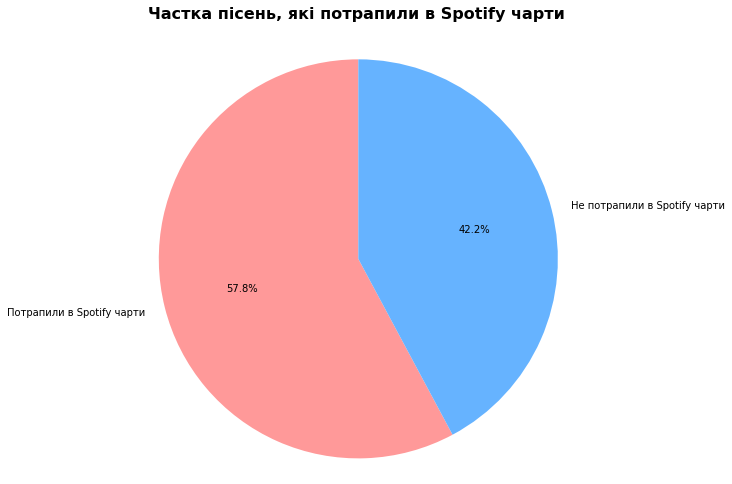

In [18]:
labels = ['Потрапили в Spotify чарти', 'Не потрапили в Spotify чарти']
sizes = [spotify_chart_songs, songs - spotify_chart_songs]
colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(8, 8), facecolor='white')
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Частка пісень, які потрапили в Spotify чарти \n', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

##### Окремо ще візуалізувала для останніх трьох років

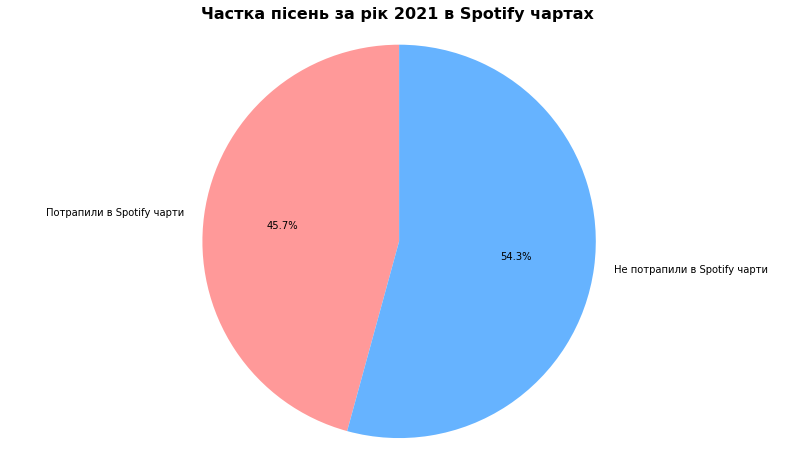

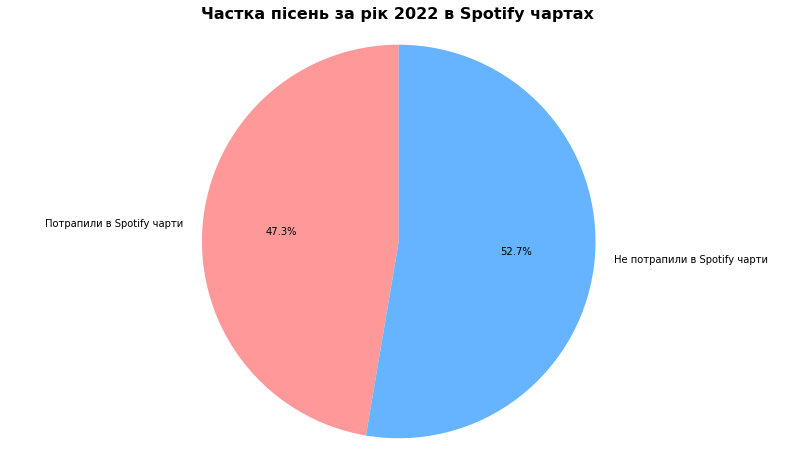

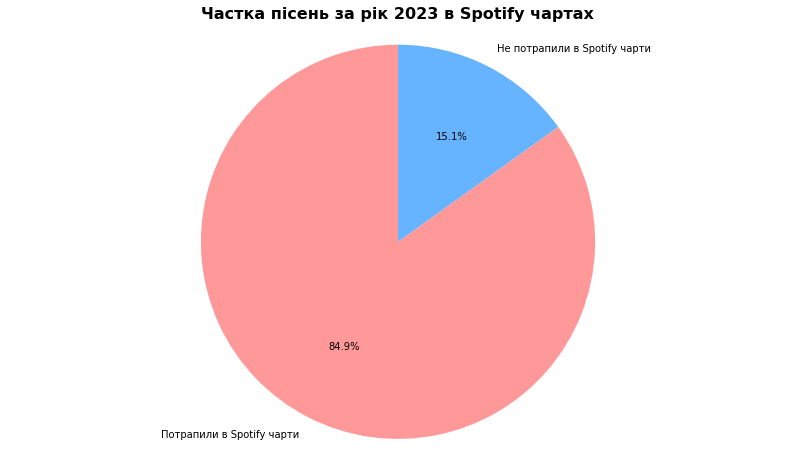

In [19]:
selected_years = [2021, 2022, 2023]
data_by_year = [df[df['released_year'] == year] for year in selected_years]

for i, year in enumerate(selected_years):
    spotify_chart_songs_by_years = data_by_year[i][data_by_year[i]['in_spotify_charts'] != 0].track_name.nunique()
    songs = data_by_year[i].track_name.nunique()
    
    labels = ['Потрапили в Spotify чарти', 'Не потрапили в Spotify чарти']
    sizes = [spotify_chart_songs_by_years, songs - spotify_chart_songs_by_years]
    colors = ['#ff9999', '#66b3ff']

    plt.figure(figsize=(14, 8), facecolor='white')
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title(f'Частка пісень за рік {year} в Spotify чартах', fontsize=16, fontweight='bold')
    plt.axis('equal')
    plt.show()

Бачимо, що в 2023 році, майже 85 відсотків пісень з датасету потрапили в Спотіфай чарти. Це питання можна було б дослідити глибше, аби зрозуміти чи це Спотіфай щось змінив, чи є певна закономірність в тому як написані пісні.

### Завдання 3
Динаміка популярності треку в залежності від часу: Побудуйте лінійний графік, який відображає зміни кількості прослуховувань певного треку протягом року 2023 року. 

У нас немає даних для побудови візуалізації про динаміку, адже ми маємо лише дату виходу і загальну кількість прослуховувань.

Тому, `я вирішила побудувати графік, який відображатиме кількість випущених пісень за місяцями впродовж року`. 

In [20]:
# спочатку вирішила обрати 2023 рік
df_2023 = df[df['released_year'] == 2023]
df_2023.head(3)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,263,45.0,10,826.0,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,126,58.0,14,382.0,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,207,91.0,14,949.0,138,F,Major,51,32,53,17,0,31,6


In [21]:
# але потім подивилася, що у нас не для всіх місяців наразі є інформація
df_2023.released_month.unique()

array([7, 3, 6, 5, 4, 2, 1], dtype=int64)

In [22]:
# тому вирішила дослідити 2022
df_2022 = df[df['released_year'] == 2022]

df_2022.head(3)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
15,Kill Bill,SZA,1,2022,12,8,8109,77,1.163094e+09,183,162,161.0,12,187.0,89,G#,Major,64,43,73,5,17,16,4
26,Calm Down (with Selena Gomez),"Rï¿½ï¿½ma, Selena G",2,2022,3,25,7112,77,8.991834e+08,202,119,318.0,38,96.0,107,B,Major,80,82,80,43,0,14,4
32,Creepin',"The Weeknd, 21 Savage, Metro Boomin",3,2022,12,2,6036,88,8.439575e+08,113,149,245.0,23,27.0,98,C#,Minor,71,17,61,36,0,8,5


In [23]:
df_2022.released_month.unique()

array([12,  3, 10,  8,  5,  6,  7,  9,  4, 11,  1,  2], dtype=int64)

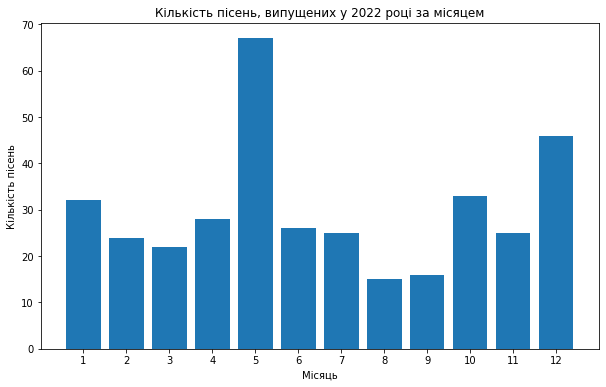

In [24]:
monthly_counts = df_2022['released_month'].value_counts().sort_index()

# Побудова графіку.
plt.figure(figsize=(10, 6))
plt.bar(monthly_counts.index, monthly_counts.values, tick_label=range(1, 13))
plt.xlabel('Місяць')
plt.ylabel('Кількість пісень')
plt.title('Кількість пісень, випущених у 2022 році за місяцем')
plt.show()

Погралася з налаштуваннями:

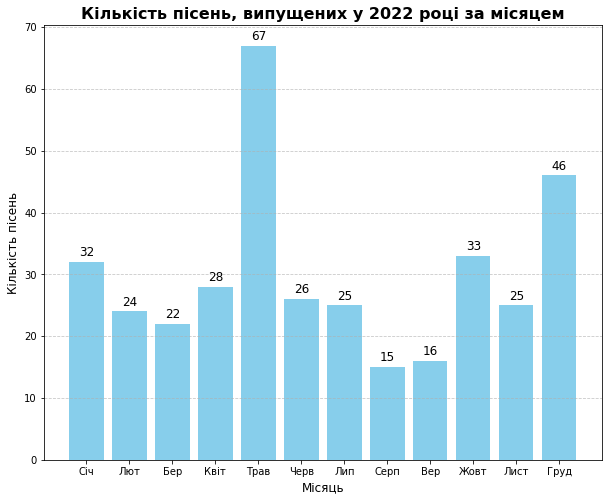

In [25]:
plt.figure(figsize=(10, 8))
bars = plt.bar(monthly_counts.index, monthly_counts.values, color='skyblue')
plt.xlabel('Місяць', fontsize=12)
plt.ylabel('Кількість пісень', fontsize=12)
plt.title('Кількість пісень, випущених у 2022 році за місяцем', fontsize=16, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), 
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=12)

# Змінила на назви місяців на вісі X(замість номеру)
month_names = ['Січ', 'Лют', 'Бер', 'Квіт', 'Трав', 'Черв', 'Лип', 'Серп', 'Вер', 'Жовт', 'Лист', 'Груд']
plt.xticks(monthly_counts.index, month_names)
plt.show()

Раніше я досліджувала кількість пісень, які потрапили в Спотіфай чарти. 
Цікаво тепер подивитися співвідношення загальної кількості пісень по місяцям в 2022 році і кількість пісень в чарті.

In [26]:
df_2022_spotify_chart = df[(df['released_year'] == 2022) & (df['in_spotify_charts'] != 0)]
monthly_counts_spotify_2022 = df_2022_spotify_chart['released_month'].value_counts().sort_index()

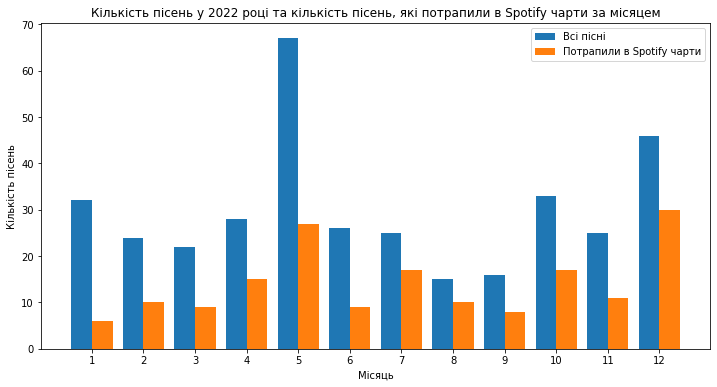

In [27]:
plt.figure(figsize=(12, 6))

plt.bar(monthly_counts.index - 0.2, monthly_counts.values, width=0.4, label='Всі пісні')
plt.bar(monthly_counts_spotify_2022.index + 0.2, monthly_counts_spotify_2022.values, width=0.4, label='Потрапили в Spotify чарти')

plt.xlabel('Місяць')
plt.ylabel('Кількість пісень')
plt.title('Кількість пісень у 2022 році та кількість пісень, які потрапили в Spotify чарти за місяцем')
plt.xticks(range(1, 13))
plt.legend()
plt.show()

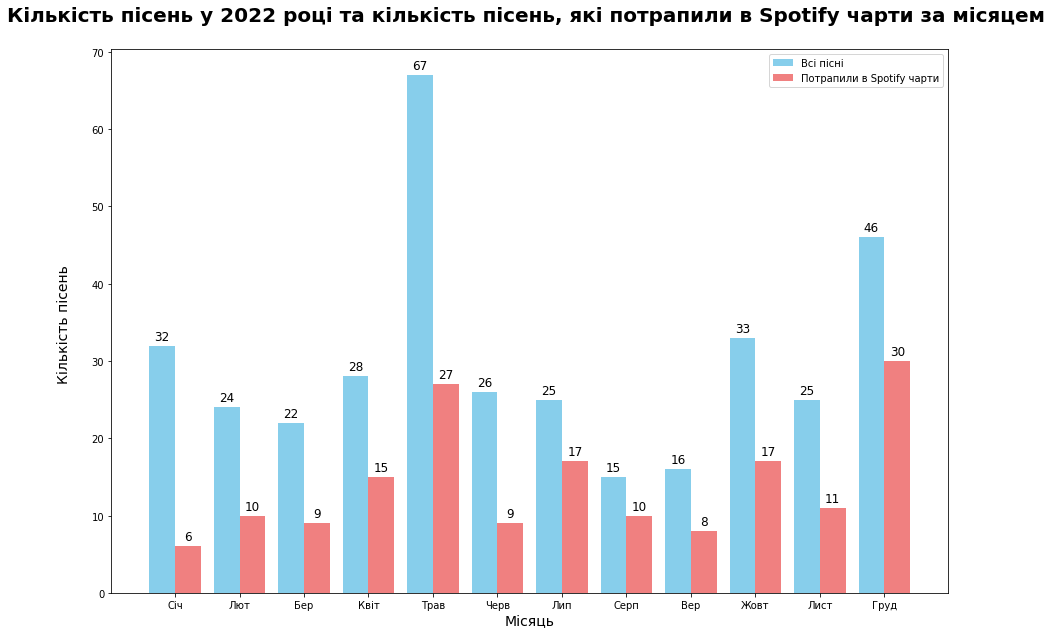

In [28]:
plt.figure(figsize=(15, 10))

bars1 = plt.bar(monthly_counts.index - 0.2, monthly_counts.values, width=0.4, label='Всі пісні', color='skyblue')
bars2 = plt.bar(monthly_counts_spotify_2022.index + 0.2, monthly_counts_spotify_2022.values, width=0.4, label='Потрапили в Spotify чарти', color='lightcoral')

plt.xlabel('Місяць', fontsize = 14)
plt.ylabel('Кількість пісень \n', fontsize = 14) # \n додаю аби був простір, візуально так мені більше подобається
plt.title('Кількість пісень у 2022 році та кількість пісень, які потрапили в Spotify чарти за місяцем \n', fontsize=20, fontweight = 'bold')
plt.xticks(monthly_counts.index, month_names)

# Додавання анотацій на стовпці
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=12, color='black')

plt.legend()
plt.show()


Бачимо, що немає прямопропорційної залежності між кількістю випущених пісень та кількістю тих, які потрапили в чарти

In [29]:
# порахувала співвідношення аналітично
percentage_spotify = (monthly_counts_spotify_2022 / monthly_counts) * 100

data = {'Місяць': month_names,
        'Кількість пісень': monthly_counts.values,
        'Потрапили в Spotify чарти': monthly_counts_spotify_2022.values,
        'Відсоток в Spotify чартах': percentage_spotify}
df_table = pd.DataFrame(data)

df_table

,Місяць,Кількість пісень,Потрапили в Spotify чарти,Відсоток в Spotify чартах
1,Січ,32,6,18.750000
2,Лют,24,10,41.666667
3,Бер,22,9,40.909091
4,Квіт,28,15,53.571429
5,Трав,67,27,40.298507
6,Черв,26,9,34.615385
7,Лип,25,17,68.000000
8,Серп,15,10,66.666667
9,Вер,16,8,50.000000
10,Жовт,33,17,51.515152


Бачимо, що найбільше потрапило пісень, випущених в липні. Можна було б дослідити ці пісні детальніше.

### Завдання 4
Рейтинг артистів на Spotify: Створіть стовпчикову діаграму, на якій відображаються 10 найпопулярніших артистів на Spotify у 2023 році за кількістю слухачів. 

In [30]:
top_artists_2023 = df_2023.groupby('artist(s)_name')['streams'].sum().reset_index()
top_artists_2023 = top_artists_2023.sort_values(by='streams', ascending=False)
top_10_artists = top_artists_2023.head(10)
top_10_artists

,artist(s)_name,streams
77,Morgan Wallen,879716089.0
27,"Eslabon Armado, Peso Pluma",725980112.0
110,"Shakira, Bizarrap",721975598.0
32,Fifty Fifty,636477650.0
57,"Karol G, Shakira",618990393.0
94,"Peso Pluma, Yng Lvcas",553634067.0
48,Jimin,536997092.0
83,NewJeans,518794821.0
5,"Ariana Grande, The Weeknd",518745108.0
11,"Bad Bunny, Grupo Frontera",505671438.0


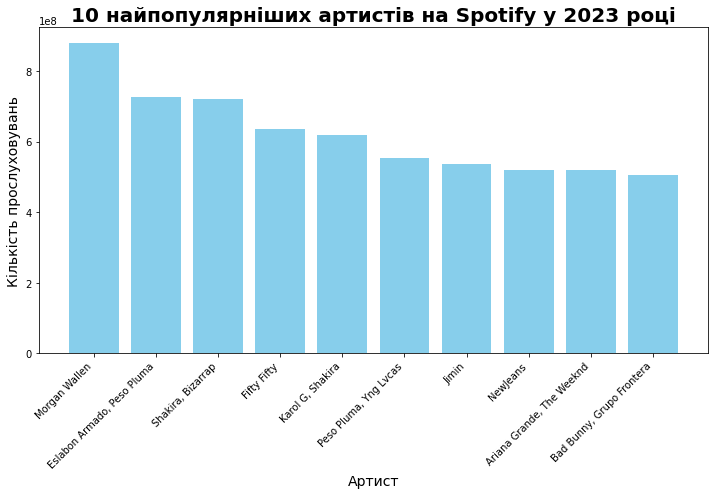

In [31]:
plt.figure(figsize=(12, 6))
plt.bar(top_10_artists['artist(s)_name'], top_10_artists['streams'], color='skyblue')
plt.xlabel('Артист', fontsize = 14)
plt.ylabel('Кількість прослуховувань', fontsize = 14)
plt.title('10 найпопулярніших артистів на Spotify у 2023 році', fontsize = 20, fontweight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.show()

### Завдання 5
Порівняння популярності трьох треків: Побудуйте горизонтальну стовпчикову діаграму, яка порівнює кількість прослуховувань трьох конкретних треків у 2023 році. 

Вирішила обрати 3 треки якогось одного артиста. 
Дивлюся, які артисти є:

і в кого є більше 3 пісень за рік

In [32]:
df_2023[df_2023['artist(s)_name'].isin(df_2023['artist(s)_name'].value_counts()[df_2023['artist(s)_name'].value_counts() > 3].index)]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
21,I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From...,Taylor Swift,1,2023,7,7,516,38,52135248.0,73,119,42.0,1,150.0,123,F#,Major,69,82,76,6,0,6,3
28,Last Night,Morgan Wallen,1,2023,1,31,2420,19,429829812.0,52,107,15.0,1,325.0,204,F#,Major,52,52,68,46,0,15,4
69,Enchanted (Taylor's Version),Taylor Swift,1,2023,7,7,148,24,39578178.0,32,93,8.0,2,5.0,82,G#,Major,51,22,53,1,0,15,3
83,Back To December (Taylor's Version),Taylor Swift,1,2023,7,7,139,17,39228929.0,16,72,5.0,0,8.0,142,D,Major,50,20,64,1,0,12,3
113,Mine (Taylor's Version),Taylor Swift,1,2023,7,7,99,15,36912123.0,21,52,6.0,1,0.0,121,G,Major,65,49,78,0,0,17,4
193,Better Than Revenge (Taylor's Version),Taylor Swift,1,2023,7,7,86,11,30343206.0,3,33,3.0,0,1.0,146,B,Minor,50,67,89,0,0,19,8
206,Hits Different,Taylor Swift,1,2023,5,26,547,0,68616963.0,15,15,6.0,0,0.0,106,F,Major,67,24,78,15,0,30,4
336,Ainï¿½ï¿½ï¿½t Tha,Morgan Wallen,1,2023,3,3,356,4,88791109.0,4,20,0.0,0,0.0,121,F#,Minor,64,67,80,0,0,36,3
337,Thinkinï¿½ï¿½ï¿½ B,Morgan Wallen,1,2023,3,3,604,6,125917280.0,22,101,0.0,0,66.0,140,D#,Minor,66,43,76,49,0,12,3
339,Everything I Love,Morgan Wallen,1,2023,1,31,579,0,95623148.0,11,54,0.0,0,103.0,104,G#,Major,56,72,85,0,0,15,3


Вирішила обрати Taylor Swift

Подивлюся тепер, які з її пісень є в цьому датасеті: 

In [33]:
taylor_swift_data = df_2023[df_2023["artist(s)_name"] == "Taylor Swift"]
taylor_swift_data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
21,I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From...,Taylor Swift,1,2023,7,7,516,38,52135248.0,73,119,42.0,1,150.0,123,F#,Major,69,82,76,6,0,6,3
69,Enchanted (Taylor's Version),Taylor Swift,1,2023,7,7,148,24,39578178.0,32,93,8.0,2,5.0,82,G#,Major,51,22,53,1,0,15,3
83,Back To December (Taylor's Version),Taylor Swift,1,2023,7,7,139,17,39228929.0,16,72,5.0,0,8.0,142,D,Major,50,20,64,1,0,12,3
113,Mine (Taylor's Version),Taylor Swift,1,2023,7,7,99,15,36912123.0,21,52,6.0,1,0.0,121,G,Major,65,49,78,0,0,17,4
193,Better Than Revenge (Taylor's Version),Taylor Swift,1,2023,7,7,86,11,30343206.0,3,33,3.0,0,1.0,146,B,Minor,50,67,89,0,0,19,8
206,Hits Different,Taylor Swift,1,2023,5,26,547,0,68616963.0,15,15,6.0,0,0.0,106,F,Major,67,24,78,15,0,30,4


> цікаво до речі, що пісня "Hits Different" має найбільшу кількість прослуховувань, але не входить у Спотіфай чарти

> а попередні 5 пісень були випущені в 1 день, можливо це її альбом

In [34]:
taylor_swift_data.track_name.unique()

array(['I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From The ',
       "Enchanted (Taylor's Version)",
       "Back To December (Taylor's Version)", "Mine (Taylor's Version)",
       "Better Than Revenge (Taylor's Version)", 'Hits Different'],
      dtype=object)

C:\Users\nasty\AppData\Local\Temp\ipykernel_12360\2465520280.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  selected_tracks_data = df_2023[df['track_name'].isin(selected_tracks)]


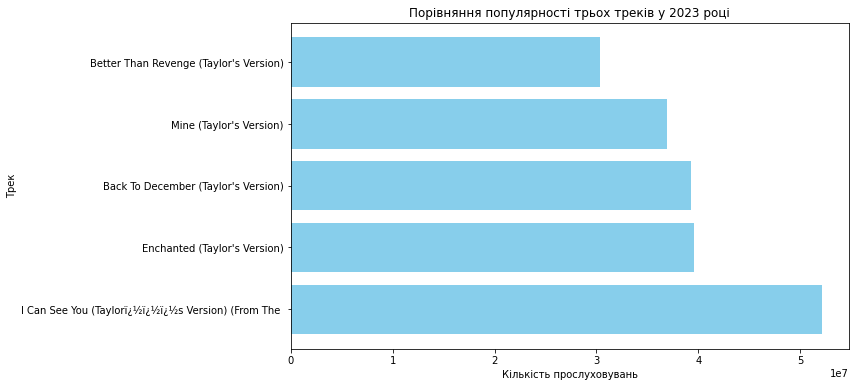

In [35]:
# взяла не 3 треки, а 5, бо не хочеться якось розділяти альбом)
selected_tracks = [
       "I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From The ",
       "Enchanted (Taylor's Version)",
       "Back To December (Taylor's Version)", 
       "Mine (Taylor's Version)",
       "Better Than Revenge (Taylor's Version)"
       ]

selected_tracks_data = df_2023[df['track_name'].isin(selected_tracks)]

plt.figure(figsize=(10, 6))
plt.barh(selected_tracks_data['track_name'], selected_tracks_data['streams'], color='skyblue')
plt.xlabel('Кількість прослуховувань')
plt.ylabel('Трек')
plt.title('Порівняння популярності трьох треків у 2023 році')

plt.show()